<a href="https://colab.research.google.com/github/Vjfrib/ED/blob/main/Ontology%2C_Knowledge_Graph%2C_LLM_%26_Corpus_textual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

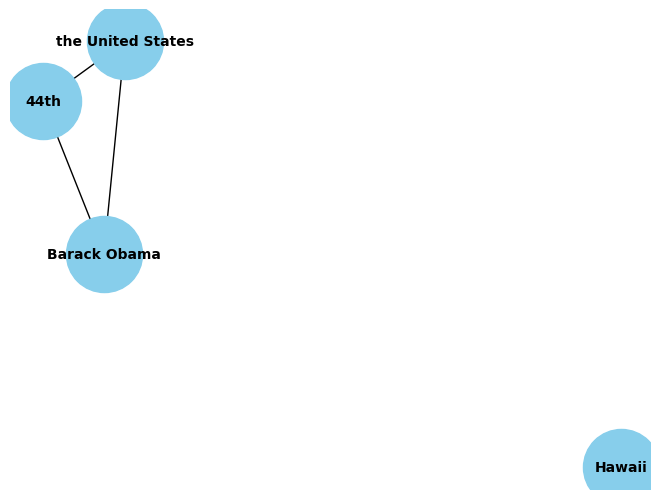

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load('en_core_web_sm')

# Texto de exemplo
corpus = "Barack Obama was the 44th president of the United States. He was born in Hawaii."

# Processar o texto
doc = nlp(corpus)

# Inicializar o grafo
G = nx.Graph()

# Adicionar nós e arestas ao grafo
for ent in doc.ents:
    G.add_node(ent.text, label=ent.label_)

for sent in doc.sents:
    for ent1 in sent.ents:
        for ent2 in sent.ents:
            if ent1 != ent2:
                G.add_edge(ent1.text, ent2.text)

# Visualizar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()


In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from owlready2 import *

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load('en_core_web_sm')

# Exemplo de corpus
corpus = ["Barack Obama was the 44th president of the United States.",
          "He was born in Hawaii."]

# Pré-processamento do texto
docs = [nlp(text) for text in corpus]

# Extração de entidades e relações
entities = set()
relations = []

for doc in docs:
    for ent in doc.ents:
        entities.add((ent.text, ent.label_))
    for sent in doc.sents:
        for ent1 in sent.ents:
            for ent2 in sent.ents:
                if ent1 != ent2:
                    relations.append((ent1.text, ent2.text))

# Construção do grafo de conhecimento
G = nx.Graph()

# Adicionar nós e arestas ao grafo
for entity in entities:
    G.add_node(entity[0], label=entity[1])

for rel in relations:
    G.add_edge(rel[0], rel[1])

# Visualizar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

# Desenvolvimento de uma ontologia
# Criação de uma nova ontologia
onto = get_ontology("http://example.org/onto.owl")

with onto:
    class Person(Thing):
        pass
    class Place(Thing):
        pass
    class Event(Thing):
        pass
    class born_in(Person >> Place):
        pass
    class president_of(Person >> Place):
        pass

# Adicionar instâncias à ontologia
barack = Person("Barack_Obama")
usa = Place("United_States")
hawaii = Place("Hawaii")

# Adicionar relações
born_in(barack, hawaii)
president_of(barack, usa)

# Salvar a ontologia
onto.save(file="ontology.owl", format="rdfxml")


ModuleNotFoundError: No module named 'owlready2'

In [ ]:
!pip install owlready2
!apt-get install graphviz
!pip install pygraphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 40.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.46-cp310-cp310-linux_x86_64.whl size=24087766 sha256=6d5aa134d13d0b6efef2cd7cf9e77d6e61be542f754b72ae9c95eda7a4ac45f0
  Stored in directory: /root/.cache/pip/wheels/bf/6f/ef/35df148baa59fc6b243aca4f101e17aed14b67dc1166b73fe0
Successfully built owlready2
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from owlready2 import *
import pygraphviz as pgv

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load('en_core_web_sm')

# Exemplo de corpus
corpus = ["Barack Obama was the 44th president of the United States.",
          "He was born in Hawaii."]

# Pré-processamento do texto
docs = [nlp(text) for text in corpus]

# Extração de entidades e relações
entities = set()
relations = []

for doc in docs:
    for ent in doc.ents:
        entities.add((ent.text, ent.label_))
    for sent in doc.sents:
        for ent1 in sent.ents:
            for ent2 in sent.ents:
                if ent1 != ent2:
                    relations.append((ent1.text, ent2.text))

# Construção do grafo de conhecimento
G = nx.Graph()

# Adicionar nós e arestas ao grafo
for entity in entities:
    G.add_node(entity[0], label=entity[1])

for rel in relations:
    G.add_edge(rel[0], rel[1])

# Visualizar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

# Desenvolvimento de uma ontologia
# Criação de uma nova ontologia
onto = get_ontology("http://example.org/onto.owl")

with onto:
    class Person(Thing):
        pass
    class Place(Thing):
        pass
    class Event(Thing):
        pass
    class born_in(Person >> Place):
        pass
    class president_of(Person >> Place):
        pass

# Adicionar instâncias à ontologia
barack = Person("Barack_Obama")
usa = Place("United_States")
hawaii = Place("Hawaii")

# Adicionar relações
born_in(barack, hawaii)
president_of(barack, usa)

# Salvar a ontologia
onto.save(file="ontology.owl", format="rdfxml")

# Plotar a ontologia
def plot_ontology(onto):
    dot = pgv.AGraph(strict=False, directed=True)

    for cls in onto.classes():
        dot.add_node(cls.name)

    for prop in onto.properties():
        for domain in prop.domains:
            for range in prop.ranges:
                dot.add_edge(domain.name, range.name, label=prop.name)

    dot.layout(prog='dot')
    dot.draw('ontology.png')

plot_ontology(onto)

# Exibir a ontologia
from IPython.display import Image
Image('ontology.png')


ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
!pip install owlready2
!pip install pydot
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


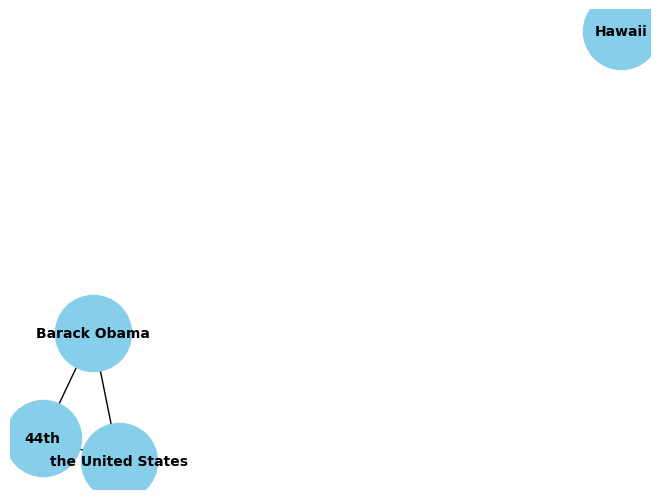

TypeError: born_in() takes no arguments

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from owlready2 import *
import pydot
from IPython.display import Image, display

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load('en_core_web_sm')

# Exemplo de corpus
corpus = ["Barack Obama was the 44th president of the United States.",
          "He was born in Hawaii."]

# Pré-processamento do texto
docs = [nlp(text) for text in corpus]

# Extração de entidades e relações
entities = set()
relations = []

for doc in docs:
    for ent in doc.ents:
        entities.add((ent.text, ent.label_))
    for sent in doc.sents:
        for ent1 in sent.ents:
            for ent2 in sent.ents:
                if ent1 != ent2:
                    relations.append((ent1.text, ent2.text))

# Construção do grafo de conhecimento
G = nx.Graph()

# Adicionar nós e arestas ao grafo
for entity in entities:
    G.add_node(entity[0], label=entity[1])

for rel in relations:
    G.add_edge(rel[0], rel[1])

# Visualizar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

# Desenvolvimento de uma ontologia
# Criação de uma nova ontologia
onto = get_ontology("http://example.org/onto.owl")

with onto:
    class Person(Thing):
        pass
    class Place(Thing):
        pass
    class Event(Thing):
        pass
    class born_in(Person >> Place):
        pass
    class president_of(Person >> Place):
        pass

# Adicionar instâncias à ontologia
barack = Person("Barack_Obama")
usa = Place("United_States")
hawaii = Place("Hawaii")

# Adicionar relações
born_in(barack, hawaii)
president_of(barack, usa)

# Salvar a ontologia
onto.save(file="ontology.owl", format="rdfxml")

# Plotar a ontologia
def plot_ontology(onto):
    dot = pydot.Dot(graph_type='digraph')

    for cls in onto.classes():
        dot.add_node(pydot.Node(cls.name))

    for prop in onto.properties():
        for domain in prop.domains:
            for range in prop.ranges:
                dot.add_edge(pydot.Edge(domain.name, range.name, label=prop.name))

    dot.write_png('ontology.png')

plot_ontology(onto)

# Exibir a ontologia
display(Image('ontology.png'))


In [ ]:
# tentativa 3, cho que estou rpetindo

!pip install owlready2
!pip install pydot
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


graf


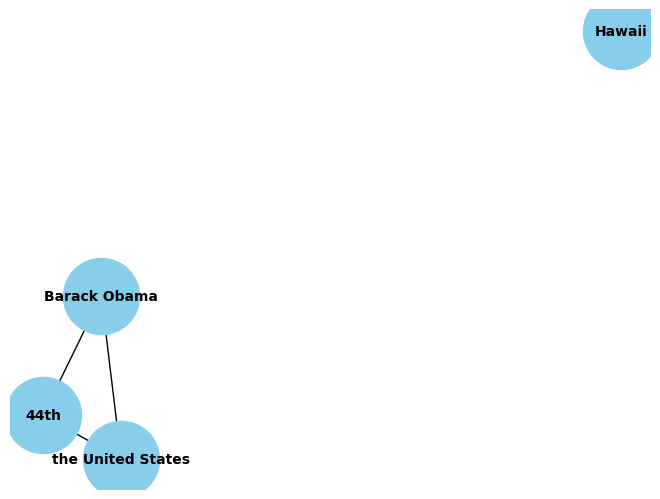

onto:


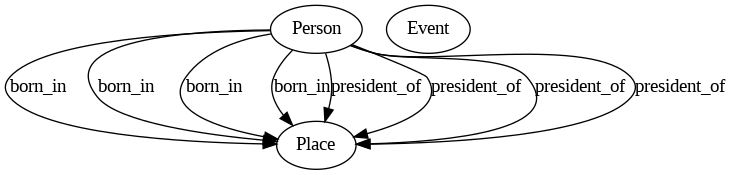

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from owlready2 import *
import pydot
from IPython.display import Image, display

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load('en_core_web_sm')

# Exemplo de corpus
corpus = ["Barack Obama was the 44th president of the United States.",
          "He was born in Hawaii."]

# Pré-processamento do texto
docs = [nlp(text) for text in corpus]

# Extração de entidades e relações
entities = set()
relations = []

for doc in docs:
    for ent in doc.ents:
        entities.add((ent.text, ent.label_))
    for sent in doc.sents:
        for ent1 in sent.ents:
            for ent2 in sent.ents:
                if ent1 != ent2:
                    relations.append((ent1.text, ent2.text))

# Construção do grafo de conhecimento
G = nx.Graph()

# Adicionar nós e arestas ao grafo
for entity in entities:
    G.add_node(entity[0], label=entity[1])

for rel in relations:
    G.add_edge(rel[0], rel[1])


print("graf")
# Visualizar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

# Desenvolvimento de uma ontologia
# Criação de uma nova ontologia
onto = get_ontology("http://example.org/onto.owl")

with onto:
    class Person(Thing):
        pass
    class Place(Thing):
        pass
    class Event(Thing):
        pass
    class born_in(Person >> Place):
        pass
    class president_of(Person >> Place):
        pass

# Adicionar instâncias à ontologia
barack = Person("Barack_Obama")
usa = Place("United_States")
hawaii = Place("Hawaii")

# Adicionar relações
barack.born_in.append(hawaii)
barack.president_of.append(usa)

# Salvar a ontologia
onto.save(file="ontology.owl", format="rdfxml")

# Plotar a ontologia
def plot_ontology(onto):
    dot = pydot.Dot(graph_type='digraph')

    for cls in onto.classes():
        dot.add_node(pydot.Node(cls.name))

    for prop in onto.properties():
        for domain in prop.domain:
            for range in prop.range:
                dot.add_edge(pydot.Edge(domain.name, range.name, label=prop.name))

    dot.write_png('ontology.png')

plot_ontology(onto)


print("onto:")

# Exibir a ontologia
display(Image('ontology.png'))
